In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the image and convert it to grayscale
path = input("ImagePath: ") or "/Users/rahulr/Downloads/us_images/09-49-17_1.jpg"
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ImagePath: /Users/rahulr/Desktop/Python_Sample/threshold/cats/cat2.jpg


In [3]:
threshold = int(input("Threshold Value:") or 60) 

Threshold Value:159


### Original Image

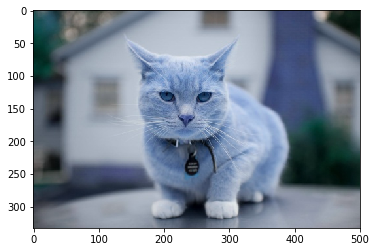

In [4]:
plt.imshow(image)
plt.show()

### Gray Image

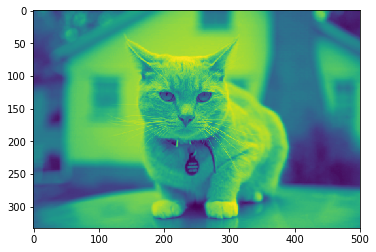

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()

### HSV IMAGE

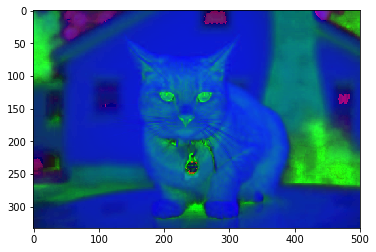

In [6]:
# converting BGR to HSV 
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 
plt.imshow(hsv)
plt.show()

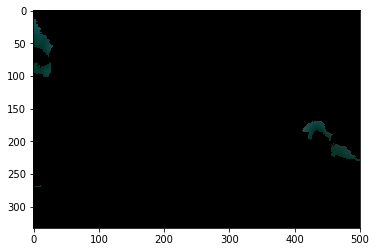

In [7]:
# define range of red color in HSV 
lower_red = np.array([30,150,50]) 
upper_red = np.array([255,255,180]) 

# create a red HSV colour boundary and  
# threshold HSV image 
mask = cv2.inRange(hsv, lower_red, upper_red)

# Bitwise-AND mask and original image 
res = cv2.bitwise_and(image,image, mask= mask) 

plt.imshow(res)
plt.show()

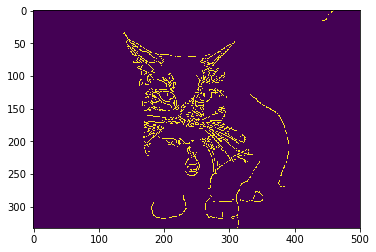

(333, 500, 3)

In [8]:
# finds edges in the input image image and 
# marks them in the output map edges 
edges = cv2.Canny(image,50,255) 
plt.imshow(edges)
plt.show()
image.shape

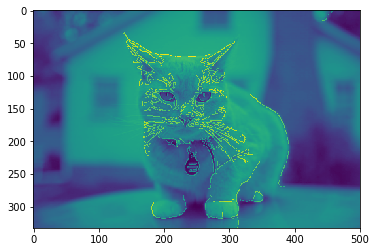

In [9]:
dst = cv2.addWeighted(gray,0.7,edges,0.3,0)
plt.imshow(dst)
plt.show()
# cv2.imshow("Out",dst)
test_image = edges

In [11]:
# for i in range(3): 
#     mask[:,i,:] = test_image[i]


# mask.shape
# masked_image = image[mask]
    
# for im in image:
#     test_image = np.multiply(test_image,image)

# test_image


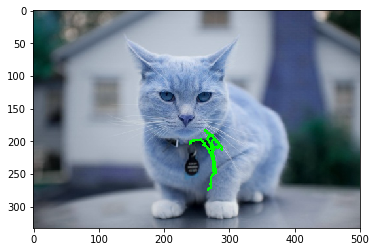

In [12]:
#find contours in the edged image, keep only the largest
# ones, and initialize our screen contour
# use RETR_EXTERNAL since we know the largest (external) contour will be the card edge.
_, cnts, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:1]
screenCnt = None

# loop over our contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.3 * peri, True)

    cv2.drawContours(image, [cnts[0]], -1, (0, 255, 0), 2)

    # if our approximated contour has four points, then
    # we can assume that we have found our card
    if len(approx) == 4:
        screenCnt = approx;
    break
    
plt.imshow(image)
plt.show()    


In [ ]:
test_image[0].size

In [ ]:

new_edges = cv2.Canny(image,100,200)
plt.imshow(new_edges)
plt.show()
